In [28]:
import numpy as np
import pandas as pd
import scipy
import statsmodels.api as sm
%matplotlib inline
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [29]:
from statsmodels.graphics.api import qqplot

In [30]:
sns.set(style="whitegrid", font_scale=1.2, context="talk", palette=sns.color_palette("bright"), color_codes=False)
matplotlib.rcParams['mathtext.fontset'] = 'cm'

# $X_t - 0.5 X_{t-1} = Z_t + 0.5 Z_{t-1}, \ Z_t \sim WN(0, \sigma^2)$

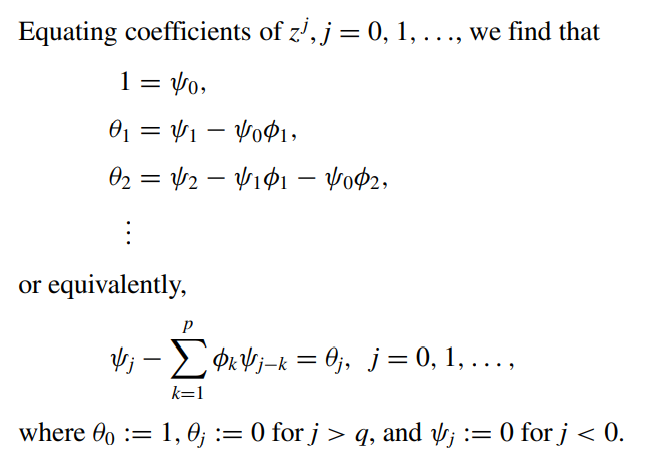

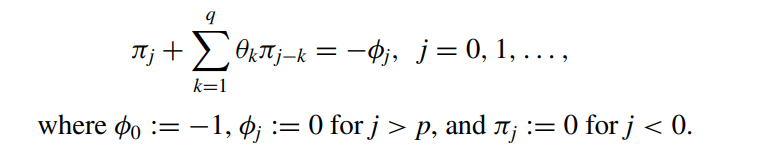

# ACVF

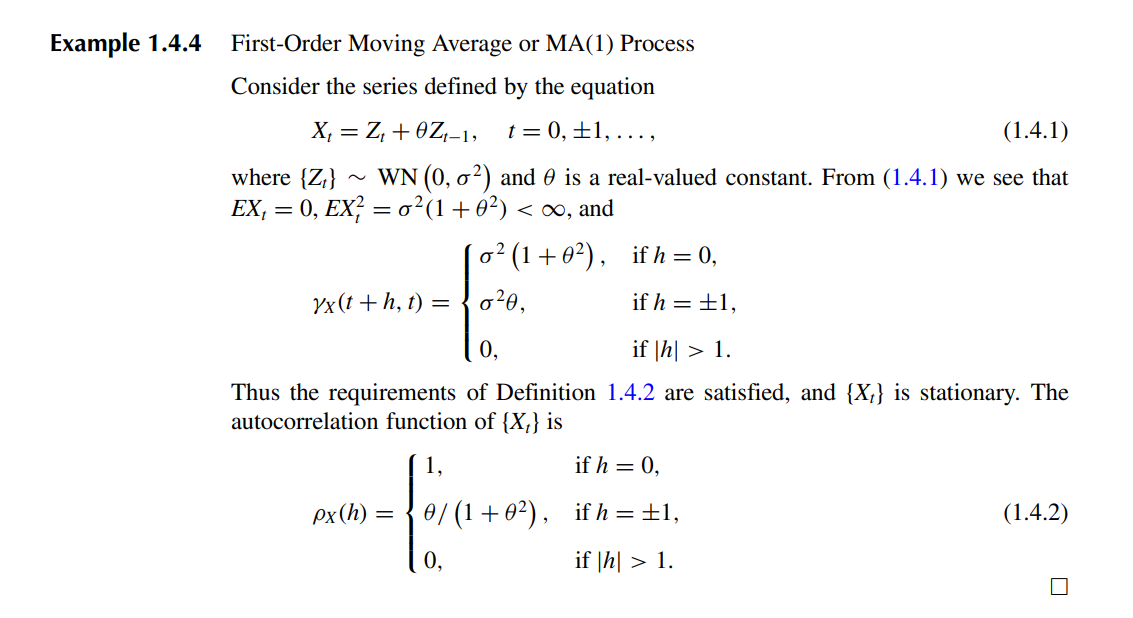

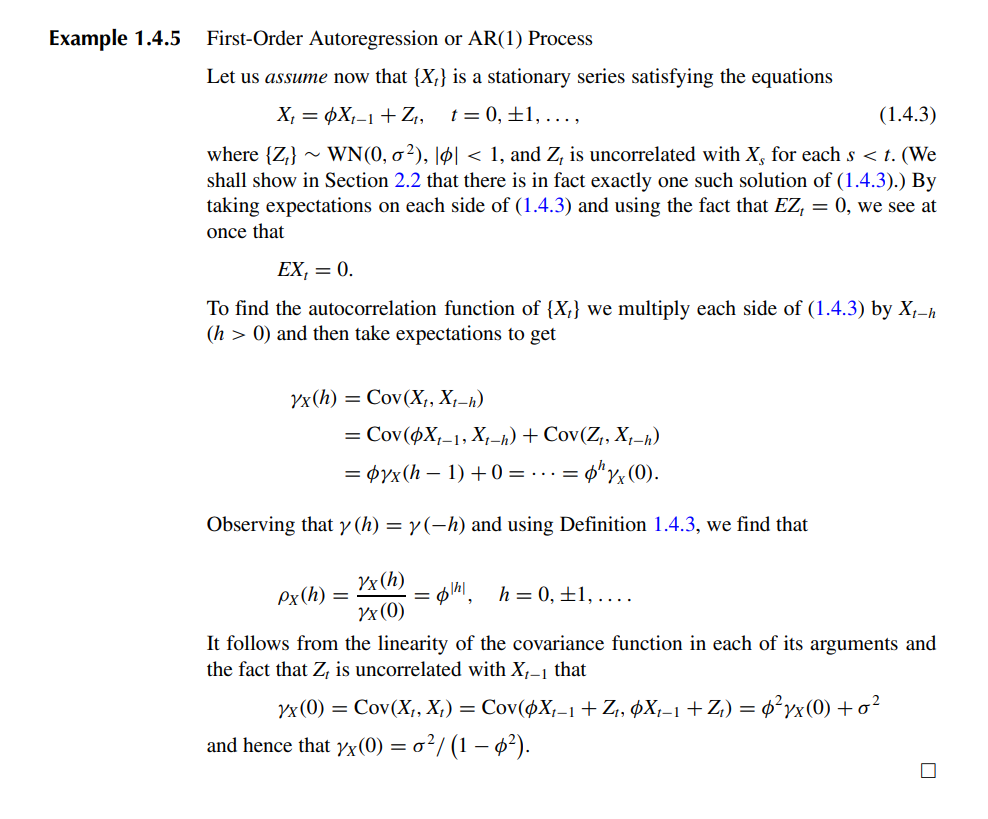

#  Prediction

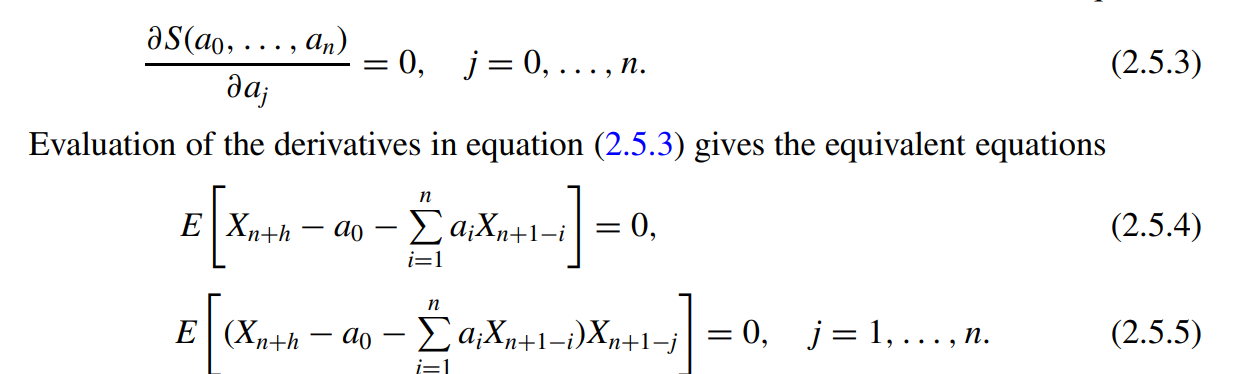

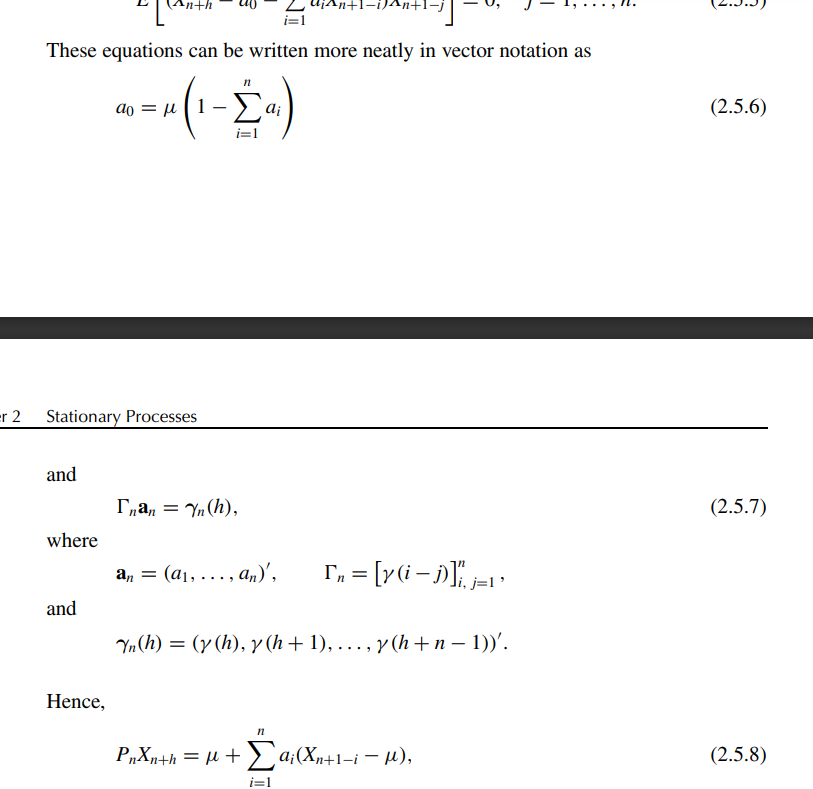

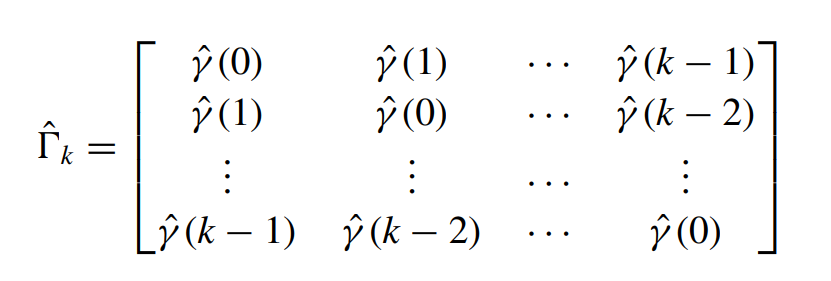

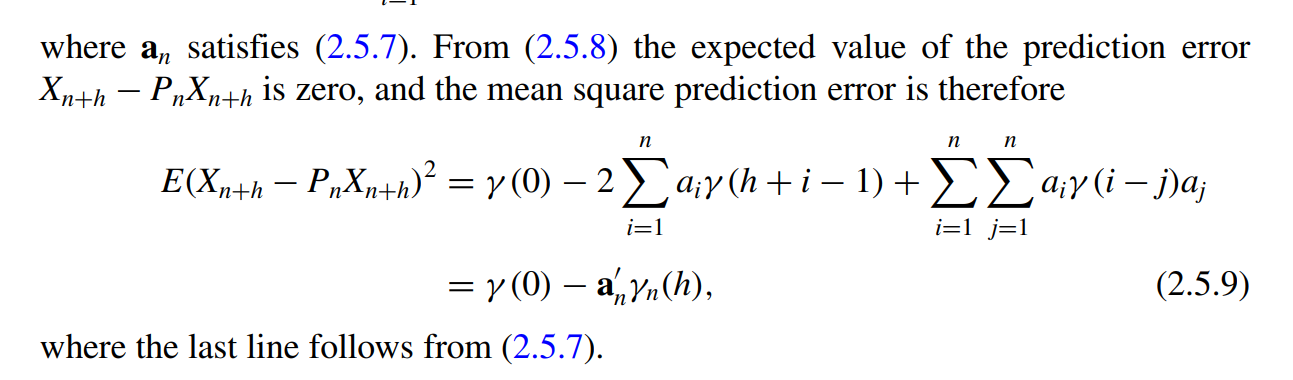

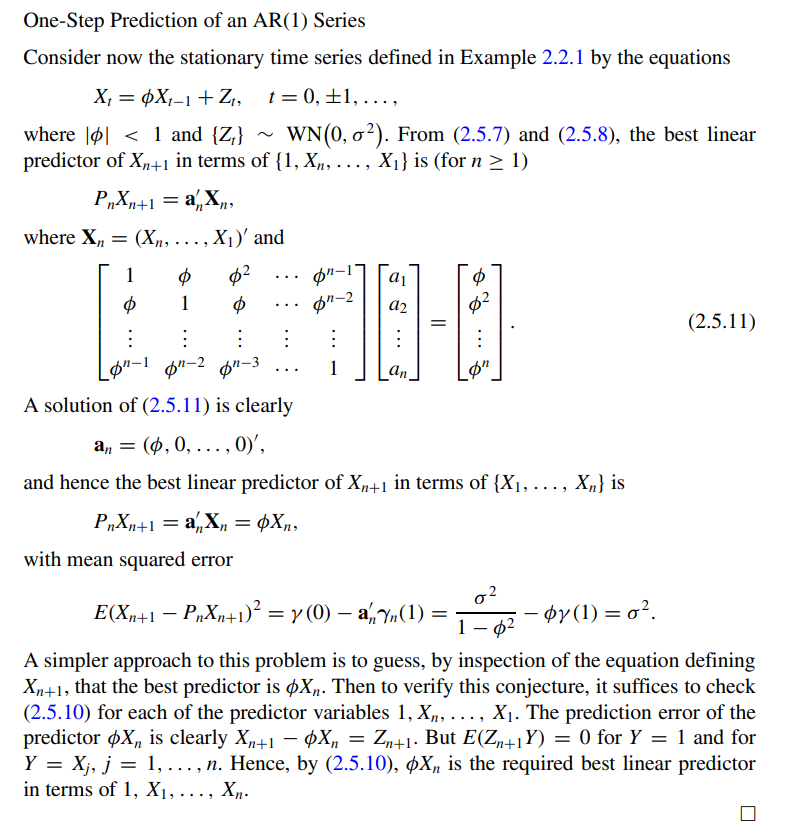

# PACF

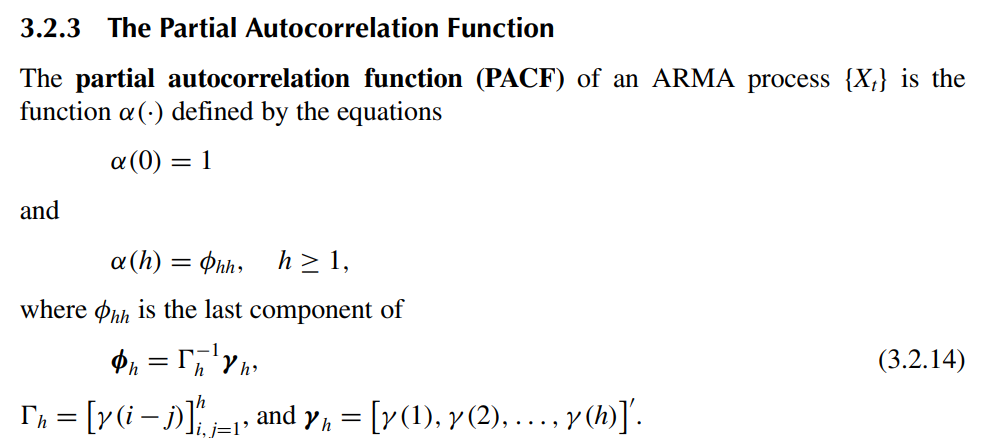

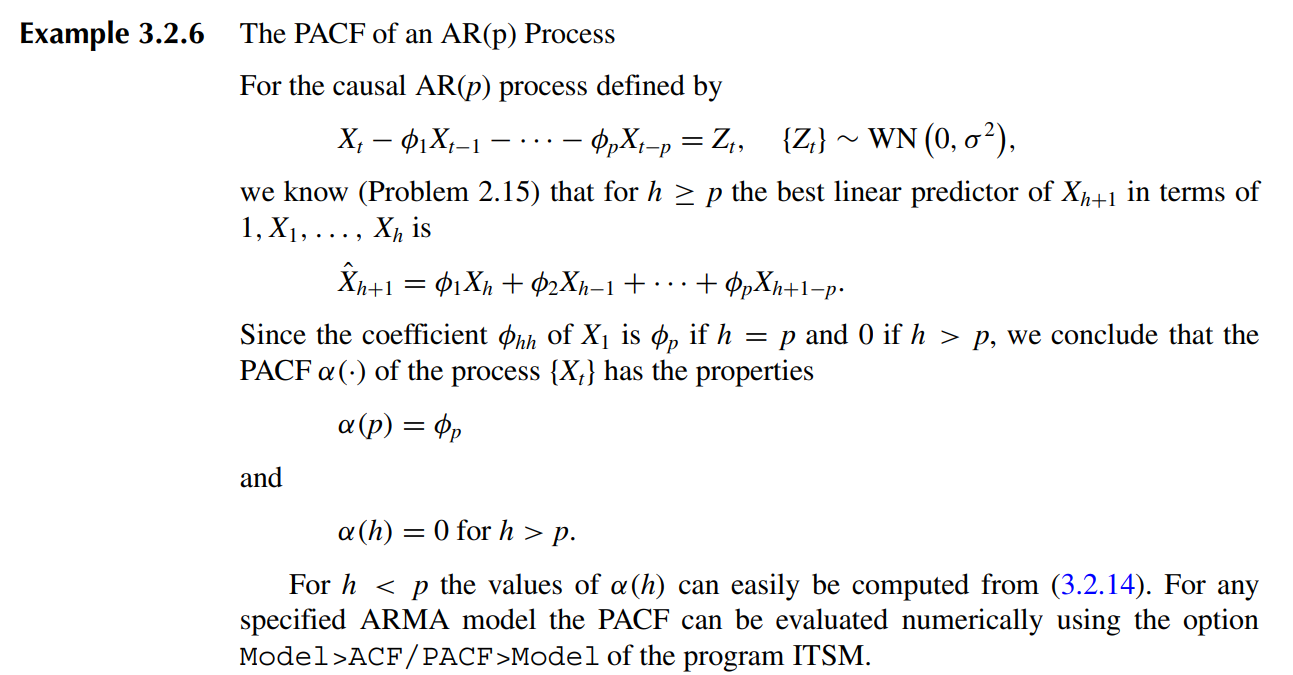

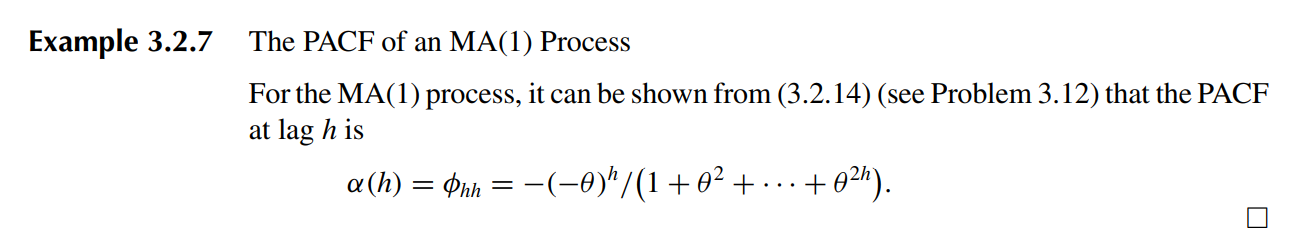

In [236]:
arparams = np.array([1, -2.1,1])
maparams = np.array([1, -0.8])
arma_process = sm.tsa.ArmaProcess(arparams, maparams)


In [237]:
arma_process.pacf(6)

ValueError: The model's autoregressive parameters (ar) indicate that the process
 is non-stationary. arma_acovf can only be used with stationary processes.


In [238]:
arma_process.isstationary

False

In [234]:
arma_process.isinvertible

True

In [230]:
arma_process.arma2ar(10)

array([1.  , 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86, 0.86])

In [235]:
arma_process.arma2ma(10)

array([1.00000e+00, 2.60000e-01, 1.18000e-01, 3.54000e-02, 1.06200e-02,
       3.18600e-03, 9.55800e-04, 2.86740e-04, 8.60220e-05, 2.58066e-05])

# 2.16

## Du lieu nhap tay

In [38]:
my_array = np.array([1,2,3,4,5,6,7,8])

df = pd.DataFrame(my_array, columns = ['D'])

df

,D
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8


In [39]:
sunspots

,D
0,101
1,82
2,66
3,35
4,31
...,...
95,30
96,16
97,7
98,37


In [40]:
mean = sunspots.mean()

In [62]:
mean

D    46.93
dtype: float64

<AxesSubplot:>

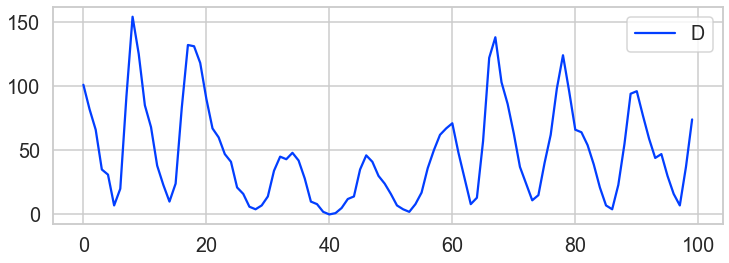

In [41]:
sunspots.plot(figsize=(12,4))

## Fit AR(2) model

In [63]:
dt = sunspots - mean

In [106]:
arma_mod20 = sm.tsa.statespace.SARIMAX(dt, order=(2,0,0)).fit(disp=False)

In [107]:
arma_mod20.params

ar.L1       1.407603
ar.L2      -0.713125
sigma2    228.079582
dtype: float64

$X_t - 1.407536X_{t-1} + 0.712786X_{t-2} = Z_t$

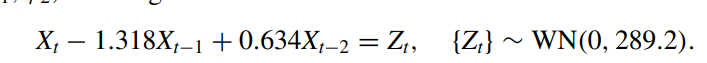

In [75]:
resid = arma_mod20.resid

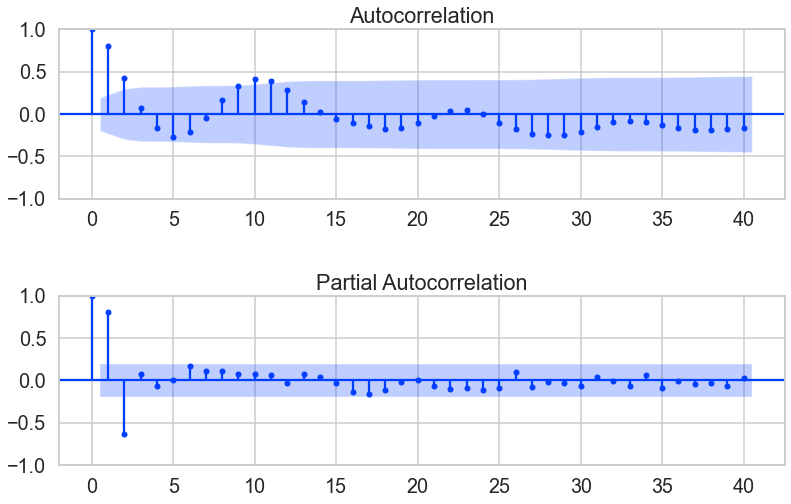

In [76]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sunspots.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sunspots, lags=40, ax=ax2, method='ywm')
fig.tight_layout(pad=2.0)

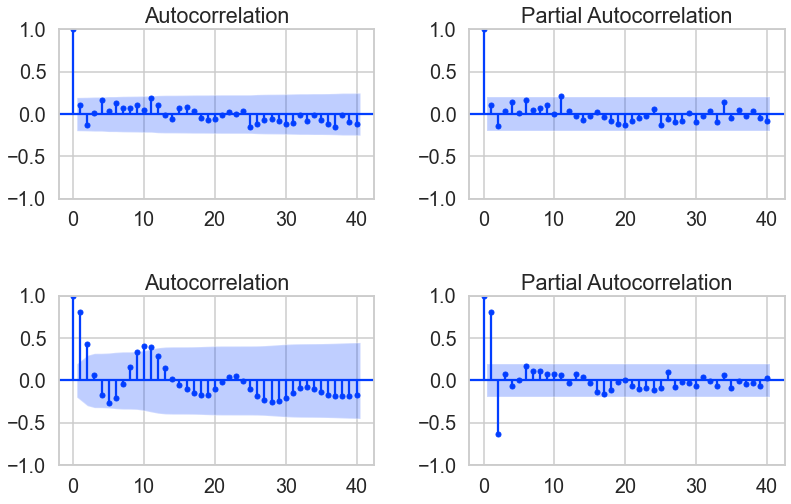

In [77]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(221)
fig = sm.graphics.tsa.plot_acf(resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(222)
fig = sm.graphics.tsa.plot_pacf(resid, lags=40, ax=ax2,method='ywm')
ax3 = fig.add_subplot(223)
fig = sm.graphics.tsa.plot_acf(sunspots.values.squeeze(), lags=40, ax=ax3)
ax4 = fig.add_subplot(224)
fig = sm.graphics.tsa.plot_pacf(sunspots, lags=40, ax=ax4, method='ywm')
fig.tight_layout(pad=2.0)

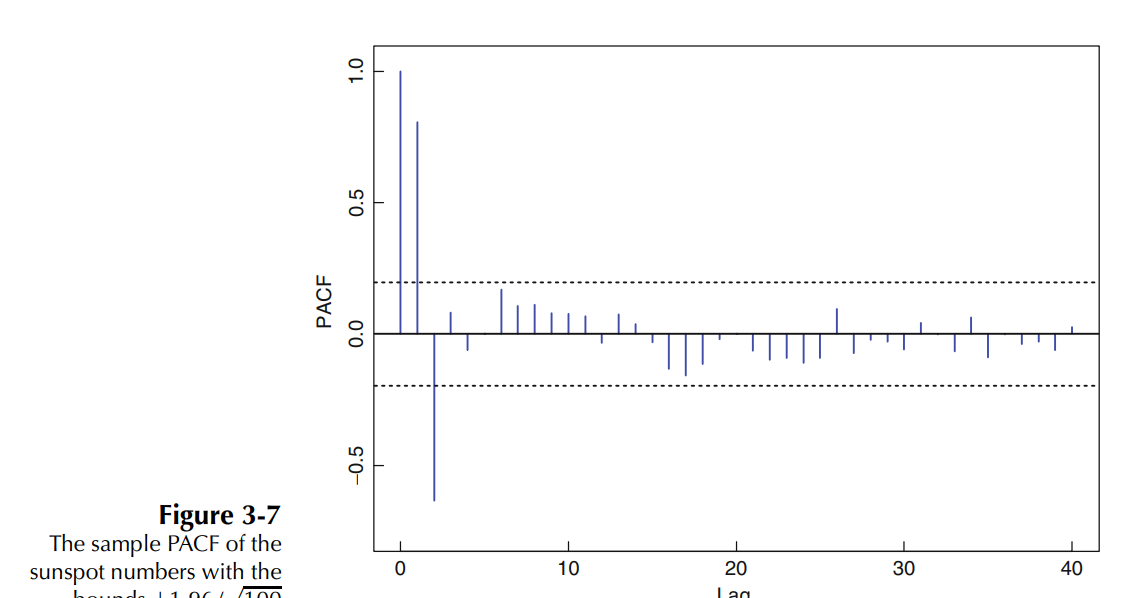

In [103]:
predicts_sunspots = arma_mod20.get_forecast(steps=2)

In [104]:
print(predicts_sunspots.summary_frame())

D         mean    mean_se  mean_ci_lower  mean_ci_upper
100  45.185136  15.102304      15.585164      74.785107
101  44.298431  26.076503      -6.810576      95.407439


In [71]:
predicts_sunspots += mean['D']

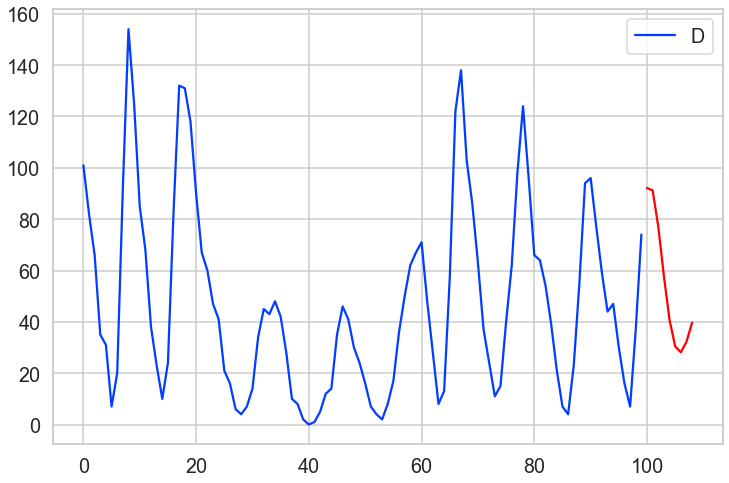

In [72]:
fig, ax = plt.subplots(figsize=(12, 8))
sunspots.plot(ax=ax)
predicts_sunspots.plot(ax=ax, style='r');